In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
import warnings
warnings.filterwarnings("ignore")
#import libraries
import pickle
# data manipulation using dataframes
import pandas as pd
# data satistical analysis
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import random


In [4]:
with open("traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [6]:
x_train.shape


(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

36

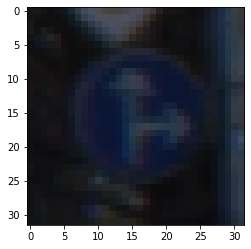

In [8]:
#German dataset
i = 1001
plt.imshow(x_train[i])
y_train[i]

In [9]:
# shuffle the dataset
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)
x_train_gray = np.sum(x_train/3, axis=3, keepdims=True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims=True)
x_validation_gray = np.sum(x_validation/3, axis=3, keepdims=True)

x_train_gray_norm = (x_train_gray -128)/128
x_test_gray_norm = (x_test_gray -128)/128
x_validation_gray_norm = (x_validation_gray -128)/128

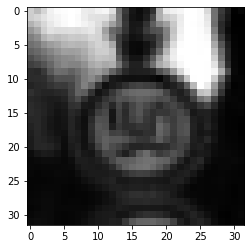

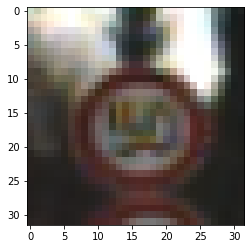

In [10]:
i = 620
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train[i])

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from subprocess import check_output
from sklearn.model_selection import train_test_split

In [12]:
image_shape = x_train_gray[i].shape

In [13]:
image_shape

(32, 32, 1)

In [14]:
cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv2D(32,3, 3, input_shape = image_shape, activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(tf.keras.layers.Dropout(0.25))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dropout(0.5))
cnn_model.add(tf.keras.layers.Dense(43, activation = 'sigmoid'))

we will use sparse_categorial_crossentropy because we have 43 different classes

In [15]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False), metrics=['accuracy'])

In [16]:
history = cnn_model.fit(x_train_gray_norm,
                       y_train,
                        batch_size=32,
                        epochs = 60,
                        verbose=1,
                        validation_data = (x_validation_gray_norm,y_validation))

Epoch 1/60
1088/1088 [==============================] - 12s 11ms/step - loss: 2.6624 - accuracy: 0.2885 - val_loss: 0.7516 - val_accuracy: 0.8234
Epoch 2/60
1088/1088 [==============================] - 11s 10ms/step - loss: 0.7691 - accuracy: 0.7674 - val_loss: 0.4386 - val_accuracy: 0.8844
Epoch 3/60
1088/1088 [==============================] - 11s 10ms/step - loss: 0.4731 - accuracy: 0.8530 - val_loss: 0.3434 - val_accuracy: 0.9007
Epoch 4/60
1088/1088 [==============================] - 11s 10ms/step - loss: 0.3658 - accuracy: 0.8895 - val_loss: 0.2554 - val_accuracy: 0.9322
Epoch 5/60
1088/1088 [==============================] - 11s 10ms/step - loss: 0.3037 - accuracy: 0.9041 - val_loss: 0.2779 - val_accuracy: 0.9202
Epoch 6/60
1088/1088 [==============================] - 11s 10ms/step - loss: 0.2635 - accuracy: 0.9202 - val_loss: 0.2557 - val_accuracy: 0.9270
Epoch 7/60
1088/1088 [==============================] - 11s 10ms/step - loss: 0.2338 - accuracy: 0.9248 - val_loss: 0.2350 -

In [19]:
cnn_model.evaluate(x_test_gray_norm, y_test, verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9376


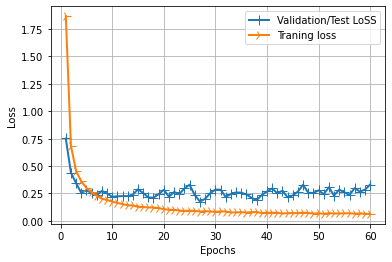

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test LoSS')
line2 = plt.plot(epochs, loss_values, label='Traning loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

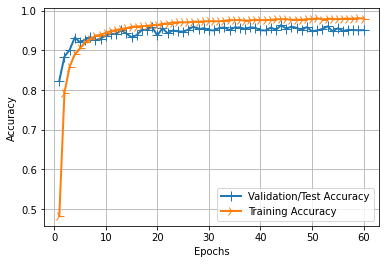

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label= 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
cnn_model.save("trafficSign.h5")

In [26]:
from keras.models import load_model
model = load_model('trafficSign.h5')

In [30]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(x_test_gray_norm)
#get the indices to be plotted
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
cm

array([[ 45,   4,   0, ...,   0,   0,   0],
       [  6, 701,   1, ...,   0,   0,   0],
       [  0,   9, 735, ...,   1,   0,   0],
       ...,
       [  0,   3,   0, ...,  72,   0,   0],
       [  0,   0,   0, ...,   0,  43,   0],
       [  0,   0,   0, ...,   0,   7,  79]])

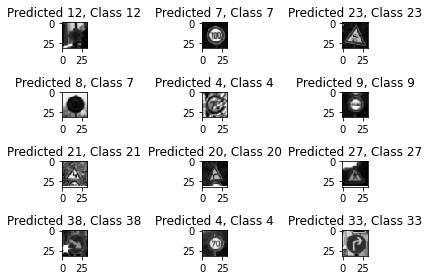

In [31]:
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(x_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()

In [32]:
# print the classification report
from sklearn.metrics import classification_report
predictions =model.predict_classes(x_test_gray)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.04      0.83      0.08        60
           1       0.22      0.89      0.36       720
           2       0.17      0.15      0.16       750
           3       0.81      0.08      0.14       450
           4       0.44      0.08      0.14       660
           5       0.20      0.00      0.00       630
           6       0.96      0.35      0.52       150
           7       0.56      0.14      0.22       450
           8       0.95      0.08      0.14       450
           9       0.79      0.78      0.78       480
          10       0.92      0.79      0.85       660
          11       0.36      0.87      0.51       420
          12       0.92      0.70      0.80       690
          13       0.42      0.99      0.59       720
          14       1.00      0.30      0.46       270
          15       0.00      0.00      0.00       210
          16       1.00      0.05      0.10       150
          17       0.99    

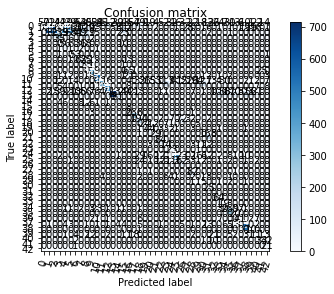

In [33]:
# Confussion matrix 
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)
    

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(43)
cm = confusion_matrix(predictions,y_test)

plt.figure(2)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')